In [97]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

In [98]:
pd.set_option('display.max_rows',5000)

In [99]:
# import the iris dataset
iris = pd.read_csv('Iris.csv')

we want to create a classifier that will predict whether an iris belongs to the ‘Iris-setosa' class or not

In [100]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [101]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [102]:
iris['setosa_dummy'] = np.where(iris['Species'].eq('Iris-setosa'),0,1)

In [103]:
# set the dependent and independent variables
y = iris['setosa_dummy']
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,4)

In [104]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [105]:
# fit the model
log_reg = LogisticRegression()
model = log_reg.fit(x_train,y_train)

# predictions
y_pred = model.predict(x_test).reshape(-1,1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
# Intercept and coefficients of the OLS model
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [-6.55335956]
Coefficients: 
 [[ 0.43853766 -0.79060982  2.18964086  0.91447191]]


The coefficient of SepalLengthCm indicates that there is a 43% probability that the species is not setosa in the first observation. The coeffient SepalWidthCm indicates that as the sepal width increases the probability that the species is not setosa decreases by 79%.

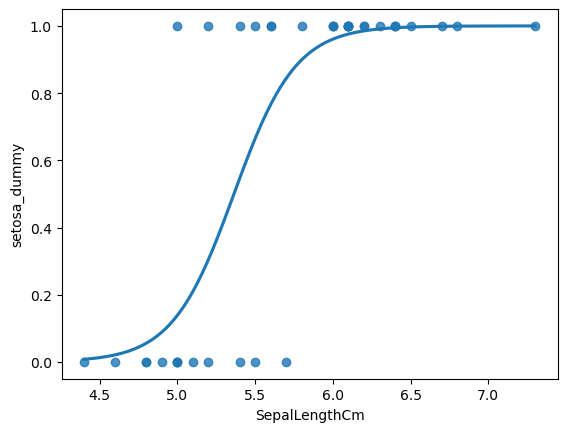

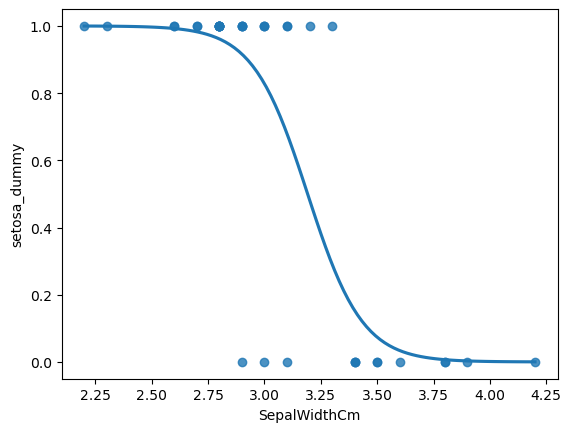

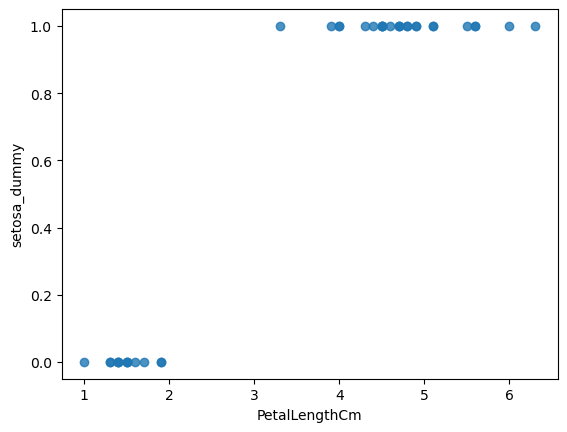

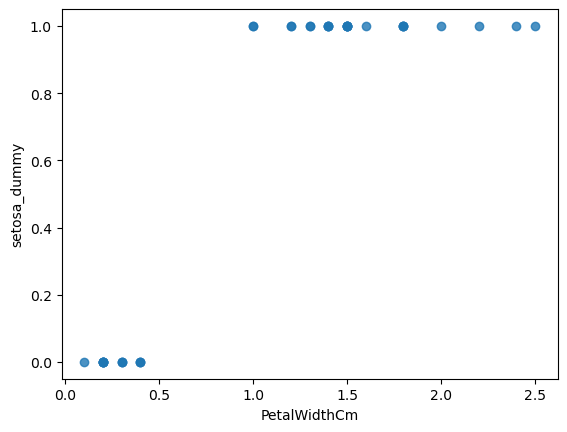

In [107]:
def logit_plotter(key,val):
    sns.regplot(x=x_test[:,key], y=y_pred, logistic=True, ci=None)
    plt.ylabel('setosa_dummy')
    plt.xlabel(val)
    plt.show()
    plt.close()
setosa_dict = {0:'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm'}
for key,value in setosa_dict.items():
    logit_plotter(key,value)

In [108]:
conf_mat

array([[10,  0],
       [ 0, 20]], dtype=int64)

In [109]:
# Model Evaluation: confusion matrix
#conf_mat = confusion_matrix(y_test, y_pred)
confusion_matrix = pd.DataFrame(conf_mat,columns = ['Setosa','Not Setosa'],
                               index = ['Setosa','Not Setosa'])
confusion_matrix

,Setosa,Not Setosa
Setosa,10,0
Not Setosa,0,20


The model never classifies setosa and not_setosa categories as one another. Therefore, given the current specification it is easy to identify setosa and non setosa species.

Secondly, we find that the model predicts only true positives and true negatives.

In [110]:
 np.array(confusion_matrix).sum()

30

In [111]:
np.array(confusion_matrix)[:,0]

array([10,  0], dtype=int64)

In [112]:
# Evaluation metrics: define functions for accuracy, precision, recall and f1 score

def accuracy(df):
    matrix = np.array(df)
    tp_plus_tn = matrix.diagonal().sum()
    total = matrix.sum()
    accuracy = round((tp_plus_tn/total)*100,2)
    return accuracy

def precision(df):
    matrix = np.array(df)
    tp = matrix[0,0]
    tp_plus_fp = matrix[0].sum()
    precision = round((tp/tp_plus_fp)*100,2)
    return precision
    
def recall(df):
    matrix = np.array(df)
    tp = matrix[0,0]
    tp_plus_fn = matrix[:,0].sum()
    recall = round((tp/tp_plus_fn)*100,2)
    return recall

def f_one_score(df): 
    precision_num = precision(df)
    recall_num = recall(df)
    f_one = 2 * ((precision_num * recall_num)/(precision_num + recall_num))
    return f_one

print(f'The accuracy is {accuracy(confusion_matrix)} %, the precision is {precision(confusion_matrix)}%, the recall is {recall(confusion_matrix)} % and the f-1 score is {f_one_score(confusion_matrix)}.')

The accuracy is 100.0 %, the precision is 100.0%, the recall is 100.0 % and the f-1 score is 100.0.


The reason why all 4 scores are 100% is because there is perfect separation happening in the x_test sample due to the petal length variables having a 1:1 relationship with whether a species is setosa or not. Below we see that as petallength equals 3 or more, the species is always not setosa.

In [127]:
iris.sort_values(['setosa_dummy','PetalLengthCm'])[['setosa_dummy','PetalLengthCm']]

,setosa_dummy,PetalLengthCm
22,0,1.0
13,0,1.1
14,0,1.2
35,0,1.2
2,0,1.3
16,0,1.3
36,0,1.3
38,0,1.3
40,0,1.3
41,0,1.3
